In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def initial_condition(x, x0):
    """
    """
    return np.exp(-(x-x0)**2)

def gamma_matrix(x, gamma):
    B       = np.zeros(len(x))
    B[0]    = 1
    B[-1]   = 1
    B[1:-1] = (1+2*gamma)
    return np.diag(B)
    

In [ ]:
class QuantumSolver:
    """
     
    """
    def __init__(self, xi=0, xf=5.0, N=100, gamma = 0.1):
        """

        """
        self.xi = xi
        self.xf = xf
        self.N = N
        self.gamma = gamma

    def generate_grid(self):
        """ 
        """
        self.x = np.linspace(self.xi, self.xf, self.N)
        return self.x
    
    def generate_potential(self):
        pass

    def create_gamma_matrix(self):
        self.gamma = gamma_matrix(self.x, self.gamma)

    def solve(self):
        """
        """
        self.generate_grid()
        self.create_gamma_matrix()
        self.psi = np.zeros((self.N, self.N))
        self.psi[:,0] = initial_condition(self.x, 2.5)
        for i in range(1, self.N):
            self.psi[:,i] = np.linalg.solve(self.gamma, self.psi[:,i-1])
        return self.psi

In [4]:
test = QuantumSolver()
sols = test.solve()

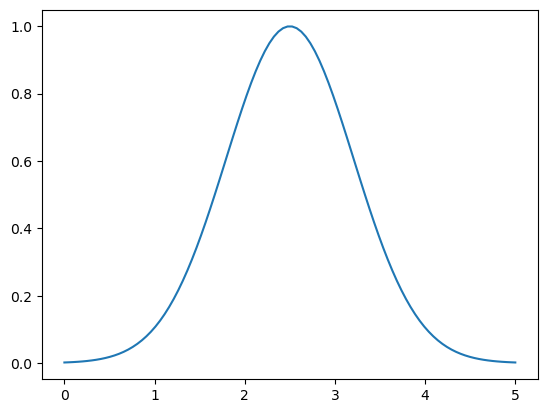

In [5]:
plt.figure()
plt.plot(test.x, sols[:,0])
plt.show()

In [15]:
gamma  = .1
xi, xf = 0.0, 5.0
xgrid  = 100
x      = np.linspace(xi, xf,xgrid)

In [17]:
psi = []
psi0 = initial_condition(x, 2.5)
psi.append(psi0)
A = gamma_matrix(x, gamma)

for i in range(10):
    psiN = np.linalg.solve(A, psi[i])
    psi.append(psiN)

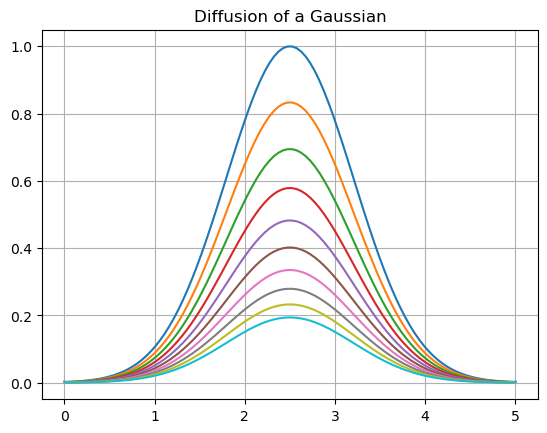

In [18]:
plt.figure()
for i in range(10):
    plt.plot(x, psi[i], label="Time {}".format(i))
plt.title("Diffusion of a Gaussian")
plt.grid()
plt.show()

In [9]:
# fig = plt.figure(figsize=(8, 8), facecolor='black')
# ax = plt.subplot(frameon=False)

In [10]:
# TODO: 
# - Incorporation of complex numbers in the PDE definition.
# - Incorporation of the gamma parameter: define a function 
#   that allows you to choose steps on both size and time.
# - Incorporation of several potentials.
# - Encapsulate code as a class.


In [12]:

# dt = 1
# gamma = -0.5 * (dt/1j)
# gamma

In [11]:
# a = np.array([1j, 3+4j, 5+6j])

In [ ]:
# Plot norm of the wavefunction

In [10]:
# import numpy as np

# # Define the diagonals
# main_diag = np.array([2, 2, 2, 2])
# upper_diag = np.array([-1, -1, -1])
# lower_diag = np.array([-1, -1, -1])

# # Create the tridiagonal matrix
# matrix = np.diag(main_diag, 0) + np.diag(upper_diag, 1) + np.diag(lower_diag, -1)

# print(matrix)


In [ ]:
# #define spacing and x,t arrays
# dx=1
# dt=1
# xi=0
# xF=10
# t0=0
# tF=10
# x0=np.linspace(0,5,100)
# t=np.linspace(t0,tF,11)
# #define initial phi
# phi = np.exp(-2*(x0-2.5)**2)
# #define empty matrix where we hold x
# x_mat=[]
# #define A

# gamma   = -0.5*(dt/dx**2)
# B       = np.zeros(len(x0))
# B[0]    = 1
# B[-1]   = 1
# B[1:-1] = (1-gamma)
# u = np.zeros(len(x0)-1)
# u[0] = 0
# u[-1] = .5*gamma
# u[1:-1] = (.5*gamma)
# L       = np.zeros(len(x0)-1)
# L[0]    = .5*gamma
# L[-1]   = 0
# L[1:-1] = (.5*gamma)
# # Create the tridiagonal matrix
# A = np.diag(B, 0) + np.diag(u, 1) + np.diag(L, -1)

In [6]:
# #solve for inital x
# sol = np.linalg.solve(A,phi)
# x_mat.append(sol)
# sol2 = np.linalg.solve(A,sol)
# x_mat.append(sol2)

In [7]:
# plt.figure()
# plt.plot(x0,x_mat[0])
# plt.show()

In [9]:
# plt.figure()
# plt.plot(x0,x_mat[0])
# plt.plot(x0,x_mat[1])
# plt.show()

In [16]:
#define spacing and x,t arrays
dx=1
dt=1
xi=0
xF=10
t0=0
tF=10
x0 = np.linspace(0,5,100)
t = np.linspace(t0,tF,11)
#define initial phi
phi = np.exp(-2*(x0-2.5)**2)
#define empty matrix where we hold x
x_mat=[]

gamma   = -0.5*(dt/dx**2)
B       = np.zeros(len(x0))
B[0]    = 1
B[-1]   = 1
B[1:-1] = (1-gamma)
u = np.zeros(len(x0)-1)
u[0] = 0
u[-1] = .5*gamma
u[1:-1] = (.5*gamma)
L       = np.zeros(len(x0)-1)
L[0]    = .5*gamma
L[-1]   = 0
L[1:-1] = (.5*gamma)
# Create the tridiagonal matrix
A = np.diag(B, 0) + np.diag(u, 1) + np.diag(L, -1)

In [17]:
A

array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.25,  1.5 , -0.25, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  1.5 , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  1.5 , -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.25,  1.5 , -0.25],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [21]:
psi = []
psi0 = initial_condition(x, 2.5)
psi.append(psi0)

for i in range(100):
    psiN = np.linalg.solve(A, psi[i])
    psi.append(psiN)

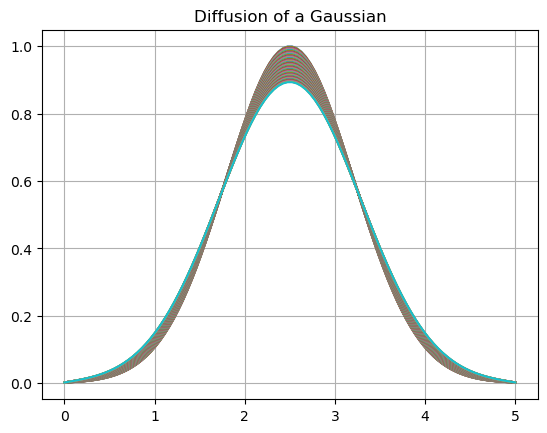

In [22]:
plt.figure()
for i in range(100):
    plt.plot(x, psi[i], label="Time {}".format(i))
plt.title("Diffusion of a Gaussian")
plt.grid()
plt.show()